# Project Name: Personalized Medicine Recommendation System




In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv('medicine.csv')

In [3]:
df.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [4]:
df.shape

(9720, 4)

In [5]:
df.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

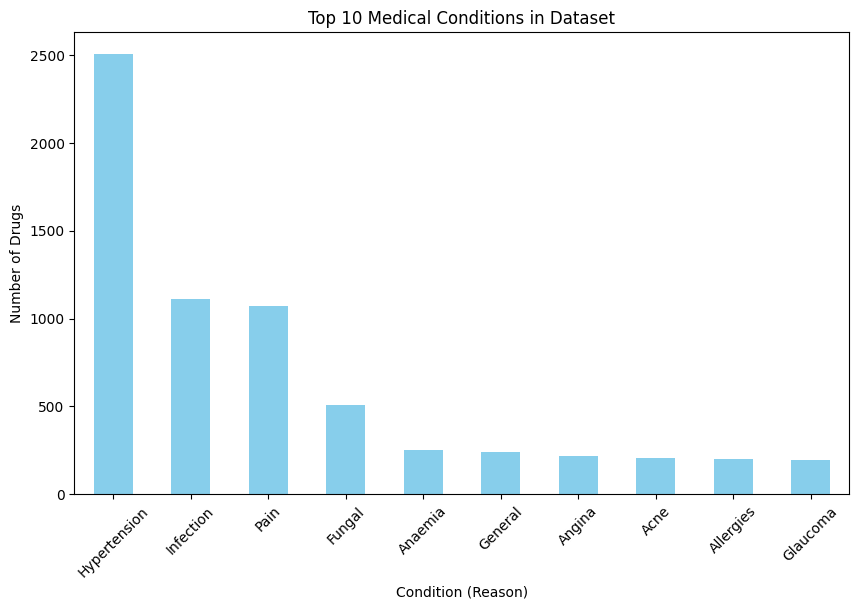

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize the most common medical conditions in the dataset
plt.figure(figsize=(10,6))
df['Reason'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Medical Conditions in Dataset')
plt.xlabel('Condition (Reason)')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=45)
plt.show()



In [9]:
df['Description']

0                           Mild to moderate acne (spots)
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                              used for treating warts
9716                        used to soften the skin cells
9717                                       used for scars
9718                                      used for wounds
9719    used to treat and remove raised warts (usually...
Name: Description, Length: 9720, dtype: object

In [10]:
df['Description'].apply(lambda x:x.split())

0                     [Mild, to, moderate, acne, (spots)]
1       [A, RET, 0.025%, is, a, prescription, medicine...
2       [It, is, used, to, treat, acne, vulgaris, in, ...
3       [It, is, used, to, treat, acne, vulgaris, in, ...
4       [treat, the, most, severe, form, of, acne, (no...
                              ...                        
9715                         [used, for, treating, warts]
9716                 [used, to, soften, the, skin, cells]
9717                                   [used, for, scars]
9718                                  [used, for, wounds]
9719    [used, to, treat, and, remove, raised, warts, ...
Name: Description, Length: 9720, dtype: object

In [11]:
df['Reason'] = df['Reason'].apply(lambda x:x.split())
df['Description'] = df['Description'].apply(lambda x:x.split())

In [12]:
df['Description'] = df['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [13]:
df['tags'] = df['Description'] + df['Reason'] 

In [14]:
new_df = df[['index','Drug_Name','tags']]

In [15]:
new_df



,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [16]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [17]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts Wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells Wound
9717,9718,Wokadine M Onit 10gm,used for scars Wound
9718,9719,Wound Fix Solution 100ml,used for wounds Wound


In [18]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [19]:
import re

def clean_drug_names(text):
    # Remove dosage information (e.g., 500mg, 10'S, 20gm)
    text = re.sub(r'\d+mg|\d+gm|\d+\'s|\d+ml', '', text, flags=re.IGNORECASE)
    # Remove extra spaces
    text = " ".join(text.split())
    return text

# Apply to a copy of the name for better matching logic
new_df['Clean_Name'] = new_df['Drug_Name'].apply(clean_drug_names)

In [20]:
new_df

,index,Drug_Name,tags,Clean_Name
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne,A CN Gel(Topical) A CN Soap
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...,A Ret 0.05% Gel A Ret 0.1% Gel A Ret 0.025% Gel
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...,ACGEL CL NANO Gel
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...,ACGEL NANO Gel
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...,Acleen 1% Lotion
...,...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts wound,T Muce Ointment
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells wound,Wokadine 10% Solution Wokadine Solution Wokadi...
9717,9718,Wokadine M Onit 10gm,used for scars wound,Wokadine M Onit
9718,9719,Wound Fix Solution 100ml,used for wounds wound,Wound Fix Solution


In [21]:
import nltk

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF instead of CountVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create the vectors
vectors = tfidf.fit_transform(new_df['tags']).toarray()

# Recalculate similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [24]:
def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y) 

In [25]:
new_df['tags'] = new_df['tags'].apply(stem)

In [26]:
similarity[1]

array([0.14501075, 1.        , 0.11715204, ..., 0.03500831, 0.03523733,
       0.01381993])

In [ ]:
def recommend(medicine):
    try:
        # Locate the medicine
        medicine_index = new_df[new_df['Drug_Name'] == medicine].index[0]
        original_reason = df.iloc[medicine_index]['Reason']
        
        # Get top 5 similar medicines
        distances = similarity[medicine_index]
        medicines_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
        
        print(f"--- Recommendations for: {clean_drug_names(medicine)} ---")
        print(f"Target Condition: {original_reason}\n")
        
        match_count = 0
        for i in medicines_list:
            rec_name = new_df.iloc[i[0]].Drug_Name
            rec_reason = df.iloc[i[0]]['Reason']
            
            # Check if the recommendation matches the original medical reason
            is_match = "✅" if rec_reason == original_reason else "❌"
            if rec_reason == original_reason: match_count += 1
            
            print(f"{is_match} Drug: {clean_drug_names(rec_name)} | Similarity: {i[1]:.2f}")
        
        # Actionable Insight: Precision Metric
        precision = (match_count / 5) * 100
        print(f"\nModel Precision for this search: {precision}%")
        
    except IndexError:
        print("Medicine not found in the database.")

# Test the improved function
recommend("Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S")

--- Recommendations for: Paracetamol Syrup Paracetamol Tablet ---
Target Condition: ['Pain']

✅ Drug: Oxypamol D Tablet | Similarity: 1.00
✅ Drug: Pacimol MF Tablet | Similarity: 1.00
✅ Drug: Painil Plus 100/ Tablet | Similarity: 1.00
✅ Drug: Pamagin Plus Gel | Similarity: 1.00
✅ Drug: Paracetamol Syrup Paracetamol Tablet | Similarity: 1.00

Model Precision for this search: 100.0%


In [29]:
import pickle

In [30]:
pickle.dump(new_df.to_dict(),open('medicine_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [31]:
import os
print("Current working directory:", os.getcwd())
print("Files here:", os.listdir())


Current working directory: c:\Users\amlan\Downloads\medicine recommendation system
Files here: ['medicine recovery system web deployment.py', 'medicine.csv', 'medicine_dict.pkl', 'Personalized_Medicine_Recommendation_System.ipynb', 'similarity.pkl']
